In [1]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score

In [3]:
"""
Defining some constants for data mining
"""

NUM_DAYS = 100    # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
symbol = 'PYPL'      # Symbol of the desired stock

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

"""
Next we pull the historical data using yfinance
Rename the column names because finta uses the lowercase names
"""

start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)

[*********************100%***********************]  1 of 1 completed


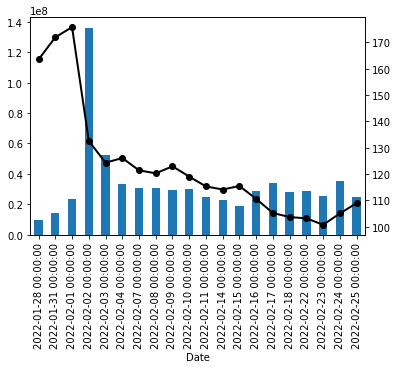

In [21]:
fig = plt.figure()
ax = latest_data['Volume'].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),latest_data[['Close']].values, color = 'black', linestyle='-', marker='o', linewidth=2.0)

[*********************100%***********************]  1 of 1 completed
1675


<AxesSubplot:xlabel='Date'>

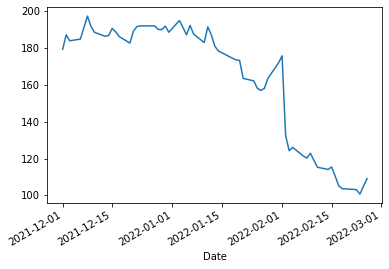

In [18]:
"""
Defining some constants for data mining
"""

NUM_DAYS = 3000    # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
symbol = 'PYPL'      # Symbol of the desired stock

# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

"""
Next we pull the historical data using yfinance
Rename the column names because finta uses the lowercase names
"""

start = (datetime.date.today() - datetime.timedelta( NUM_DAYS ) )
end = datetime.datetime.today()

data = yf.download(symbol, start=start, end=end, interval=INTERVAL)
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
print(len(data))

tmp = data.iloc[-60:]
tmp['close'].plot()

In [ ]:
for indicator in INDICATORS:
    ind_data = eval('TA.' + indicator + '(data)')